In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

data = pd.read_pickle('clean_notna_data.pickle')
X = data['X']
y = data['y']
X_with_name = X.copy()
name = X['INSTNM']

X.drop('INSTNM', axis = 1, inplace = True)
data = X.copy()
data['Y'] = y

X.head()

,MAIN,NUMBRANCH,ADM_RATE,PCIP01,PCIP03,PCIP04,PCIP05,PCIP09,PCIP10,PCIP11,...,CCSIZSET_16.0,CCSIZSET_17.0,PFTFAC_ISNA,INEXPFTE_ISNA,AVGFACSAL_ISNA,GRAD_DEBT_MDN_ISNA,C150_4_ISNA,ADM_RATE_ISNA,TUITION_ISNA,TUITION_OUT_ISNT_IN
0,1,1.0,0.5575,0.0426,0.0019,0.0155,0.0000,0.0000,0.031,0.0756,...,0,0,0,0,0,0,0,0,0,1
1,1,1.0,0.9117,0.0000,0.0000,0.0000,0.0006,0.0540,0.000,0.0276,...,0,0,0,0,0,0,0,0,0,1
2,1,1.0,0.9050,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.0574,...,0,0,0,0,0,0,0,0,0,1
3,1,1.0,0.6931,0.0000,0.0000,0.0000,0.0000,0.0393,0.000,0.1253,...,0,0,0,0,0,0,0,0,0,1
4,1,1.0,0.8462,0.0000,0.0000,0.0000,0.0041,0.1192,0.000,0.0164,...,1,0,0,0,0,0,0,0,0,1


In [11]:
name[y[X[X['YEAR'] == 2008].index].sort_values(ascending=False).index][:20]

10230          Massachusetts Institute of Technology
10613                                Duke University
10229                               MCPHS University
10815                     University of Pennsylvania
10077            Rose-Hulman Institute of Technology
10269                           Kettering University
11151                            Stanford University
10220                             Harvard University
10770                     Carnegie Mellon University
9826                        Colorado School of Mines
10469                Stevens Institute of Technology
10255                Worcester Polytechnic Institute
10490    Columbia University in the City of New York
10231                 Massachusetts Maritime Academy
10794                              Lehigh University
10556               Rensselaer Polytechnic Institute
10204                             Bentley University
9952     Georgia Institute of Technology-Main Campus
9875                           Georgetown Univ

In [2]:
ymin = min(y)
ymax = max(y)
ymean = y.mean()
ymed = y.median()
print(f"ymin = {ymin}")
print(f"ymax = {ymax}")
print(f"ymean = {y.mean()}")
print(f"ymed = {y.median()}")

ymin = 12507.878953060936
ymax = 124314.59685050015
ymean = 33059.71584594504
ymed = 31962.052872062664


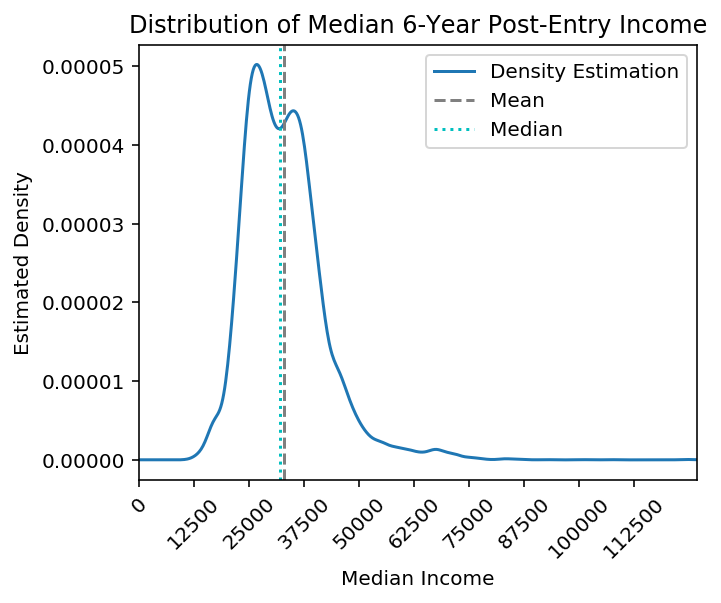

In [4]:
fig, ax = plt.subplots(figsize=(5, 4))
y.plot.kde(ax=ax, label="Density Estimation")
ax.set_ylabel("Estimated Density")
ax.set_xlabel("Median Income")
ax.set_xlim(0, ymax + 2500)
ax.set_xticks(np.arange(0, ymax + 100, 12500))
for tick in ax.get_xticklabels():
    tick.set_rotation(45)
ax.axvline(ymean, label="Mean", color="gray", linestyle="--")
ax.axvline(ymed, label="Median", color="c", linestyle=":")
ax.legend()
ax.set_title("Distribution of Median 6-Year Post-Entry Income")
plt.savefig("figs/med_income.png",dpi=300,bbox_inches = 'tight')

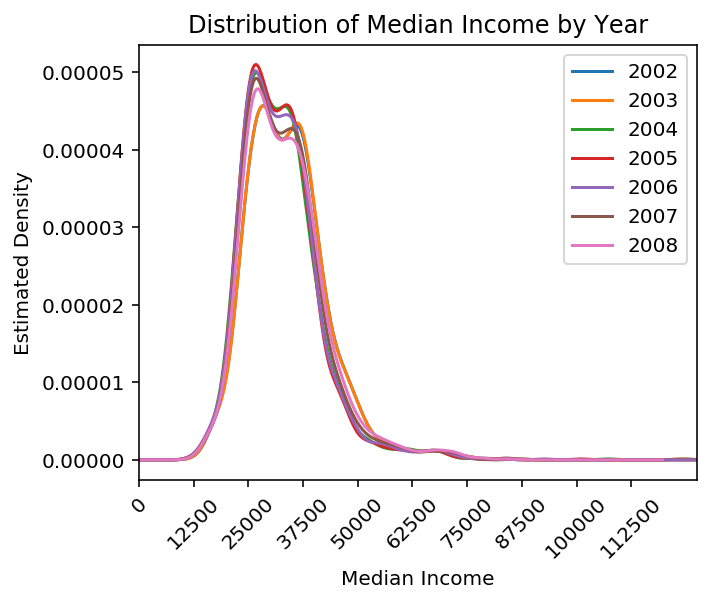

In [5]:
years = set(X["YEAR"])
fig, ax = plt.subplots(figsize=(5, 4))
for year in years:
    x = X[X["YEAR"] == year]
    y_ = y[x.index]
    ymed = y_.median()
    y_.plot.kde(ax=ax, label=int(year))
    ax.set_ylabel("Estimated Density")
    ax.set_xlabel("Median Income")
    ax.set_xlim(0, 125000 + 2500)
    ax.set_xticks(np.arange(0, ymax + 100, 12500))
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)
    # ax.axvline(ymed, label="Median", color="c", linestyle=":")
ax.legend()
ax.set_title("Distribution of Median Income by Year")
plt.savefig("figs/med_income_year.png",dpi=300,bbox_inches = 'tight')

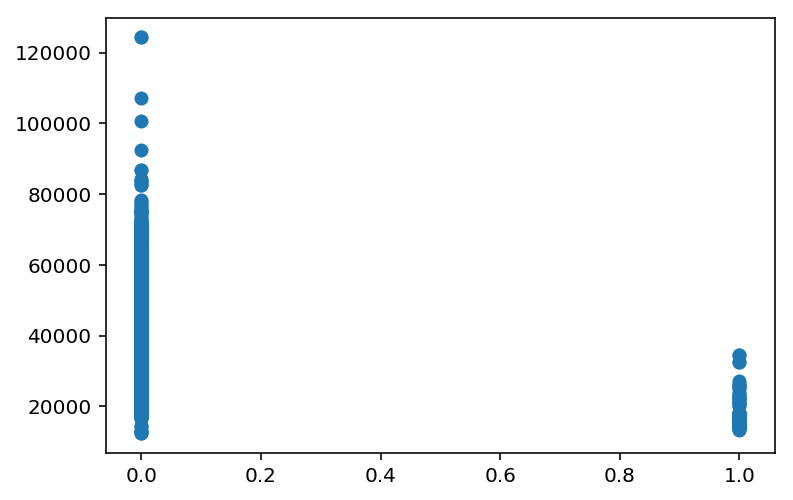

In [155]:
plt.scatter(X['REGION_Outlying Areas '],y)

In [149]:
y.sort_values(ascending=False)[:20]

2163     124314.596851
603      124314.596851
3726     107131.179880
5317     100814.596395
6960      92597.218296
604       86871.719130
2164      86871.719130
10230     84207.716221
8613      83963.331281
8614      83834.330989
6961      83032.879815
3727      82628.900125
5318      82578.901583
4646      78386.081120
10613     78163.610069
10229     77548.955206
6280      76826.590852
3717      76688.953518
594       75840.389717
2154      75840.389717
Name: MD_EARN_AVG, dtype: float64

In [150]:
name.iloc[10613]

'Duke University'

In [98]:
X_private_for_profit = X[(X["CONTROL_Private nonprofit"] == 0) & (X["CONTROL_Public"] == 0)].copy()
X_private_nonprofit = X[X["CONTROL_Private nonprofit"] == 1].copy()
X_public = X[X["CONTROL_Public"] == 1]

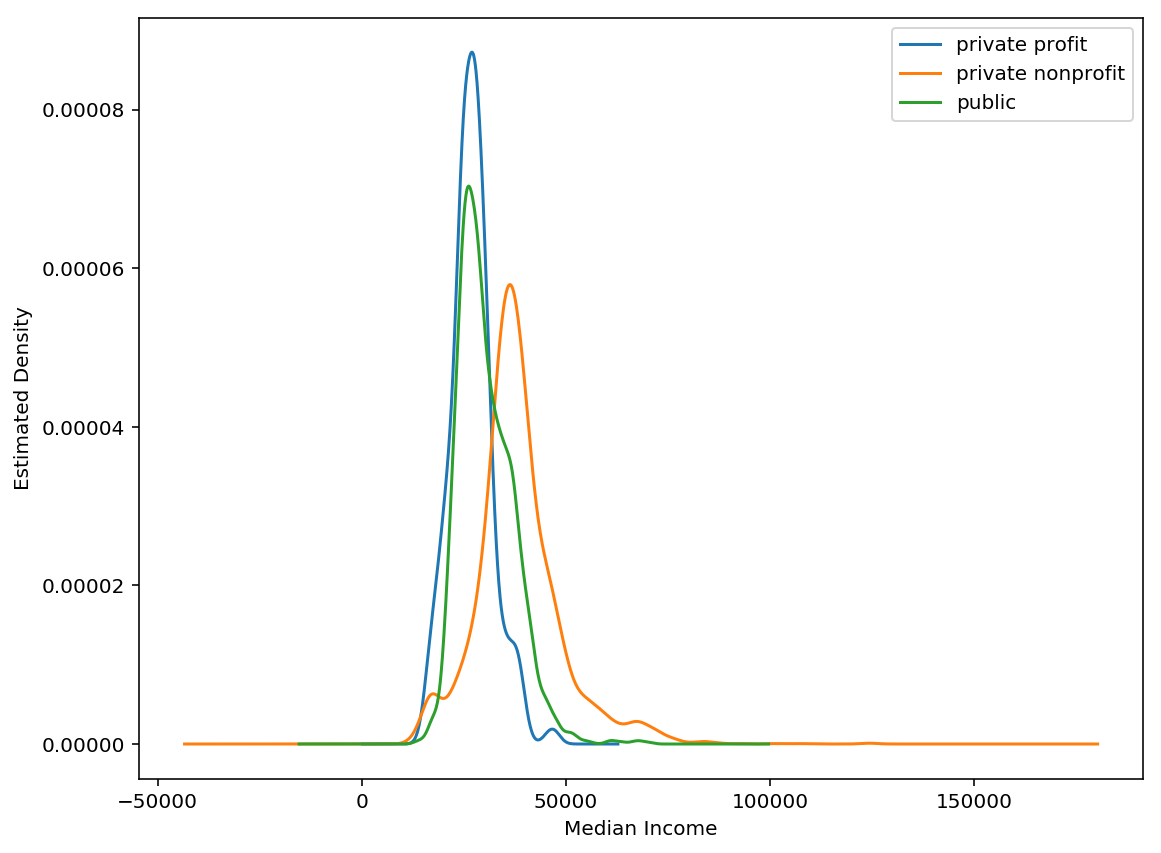

In [110]:
fig, ax = plt.subplots(figsize=(9, 7))
data = [X_private_for_profit, X_private_nonprofit, X_public]
titles = ["private profit", "private nonprofit", "public"]
for i in range(0, 3):
    x = data[i]
    y[x.index].plot.kde(ax=ax, label=titles[i])
    ymed = y[x.index].median()
    ax.set_ylabel("Estimated Density")
    ax.set_xlabel("Median Income")
#    ax.axvline(ymed, label="Median", color="gray", linestyle="--")
    ax.legend()